In [1]:
import numpy as np
import pandas as pd

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_10356\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_excel(r"F:\New folder\Customer_segmentation\Copy of customer_transactions_sample.xlsx")

In [3]:
df.shape

(525461, 8)

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(417534, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [10]:
df['Country'].value_counts()

Country
United Kingdom          379423
EIRE                      8710
Germany                   8129
France                    5710
Netherlands               2769
Spain                     1278
Switzerland               1187
Belgium                   1054
Portugal                  1024
Channel Islands            906
Sweden                     883
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65


In [11]:
most_recent_date = df['InvoiceDate'].max()
print("Most Recent Date:", most_recent_date)


Most Recent Date: 2010-12-09 20:01:00


In [12]:
day="2010-12-09"
day=pd.to_datetime(day)
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

recency=df.groupby(["Customer ID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recency.head()

,InvoiceDate
Customer ID,
12346.0,65
12347.0,1
12348.0,72
12349.0,41
12351.0,9


In [30]:
Frequency = df.groupby(['Customer ID'])[['Invoice']].nunique()

In [31]:
Frequency.head()

,Invoice
Customer ID,
12346.0,15
12347.0,2
12348.0,1
12349.0,4
12351.0,1


In [32]:
df["total_amount"]=df['Price']*df['Quantity']

In [33]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ttl_amount,total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,7.50


In [34]:
Monetary = df.groupby(['Customer ID'])[['total_amount']].sum()

In [35]:
Monetary.head()

,total_amount
Customer ID,
12346.0,-64.68
12347.0,1323.32
12348.0,222.16
12349.0,2646.99
12351.0,300.93


In [44]:
RFM=pd.concat([recency,Frequency,Monetary],axis=1)
recency.columns=["Recency"]
Frequency.columns=['Frequency']
Monetary.columns=["Monetary"]

In [45]:
RFM

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,65,15,-64.68
12347.0,1,2,1323.32
12348.0,72,1,222.16
12349.0,41,4,2646.99
12351.0,9,1,300.93
...,...,...,...
18283.0,16,6,641.77
18284.0,63,2,436.68
18285.0,294,1,427.00


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
scaled_data=scaler.fit_transform(RFM)

In [49]:
scaled_data

array([[-0.24851672,  0.95699354, -0.23118892],
       [-0.90047482, -0.33643914, -0.06824748],
       [-0.17720881, -0.43593396, -0.19751592],
       ...,
       [ 2.08427083, -0.43593396, -0.17346915],
       [ 0.20989131, -0.23694432, -0.08408261],
       [-0.74767214, -0.03795468,  0.05117522]])

In [64]:
!pip install kneed


In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

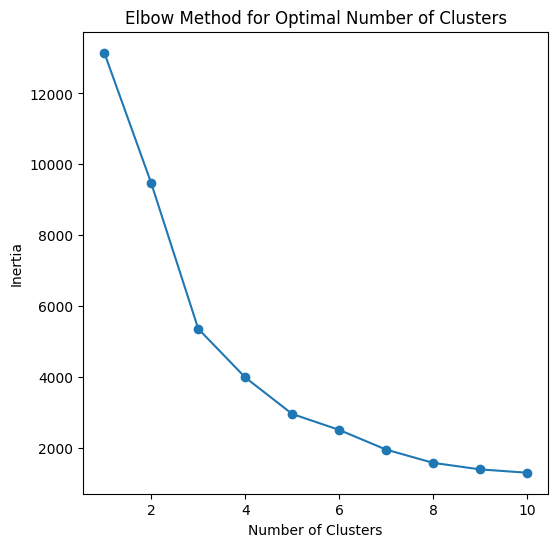

Optimal number of clusters: 4


In [70]:
inertia = []
K = np.arange(1, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the Elbow Method
plt.figure(figsize=(6, 6))
plt.plot(K, inertia, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Identify the elbow point using KneeLocator
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow
print("Optimal number of clusters:", elbow_point)

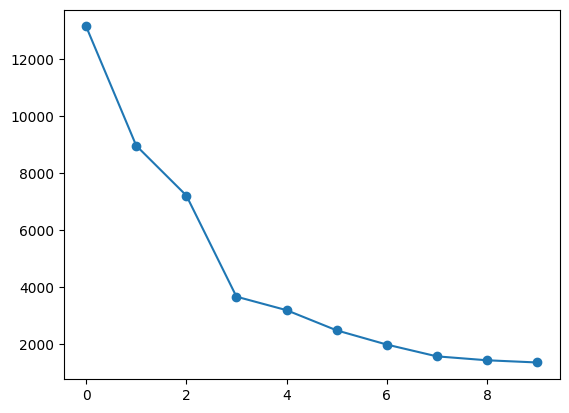

In [55]:
inertia=[]
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(inertia,marker="o")

In [71]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled_data)
RFM["Clusters"]=(kmeans.labels_)

In [72]:
RFM['Clusters'].value_counts()

Clusters
0    3273
1    1083
2      24
3       3
Name: count, dtype: int64

In [74]:
group=RFM.groupby(["Clusters"])[['Recency','Frequency','Monetary']].mean()

In [75]:
print(group)

             Recency   Frequency       Monetary
Clusters                                       
0          39.680721    5.782157    1830.084280
1         241.778393    1.900277     406.985655
2           3.708333   95.166667   47865.288833
3           4.000000  106.666667  256270.110000


In [83]:
# Define cluster names based on their characteristics
Customer_type = {0: 'Engaged Customers', 1: 'At-Risk Customers', 2: 'Loyal Champions', 3: 'Top VIPs'}

# Map the cluster labels to the dataframe
RFM['Customer_type'] = RFM['Clusters'].map(Customer_type)

# Display the mean RFM values for each labeled cluster
grouped_rfm = RFM.groupby('Customer_type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(grouped_rfm)


       Customer_type     Recency   Frequency       Monetary
0  At-Risk Customers  241.778393    1.900277     406.985655
1  Engaged Customers   39.680721    5.782157    1830.084280
2    Loyal Champions    3.708333   95.166667   47865.288833
3           Top VIPs    4.000000  106.666667  256270.110000


In [92]:
RFM

,Recency,Frequency,Monetary,Clusters,Customer_type
Customer ID,,,,,
12346.0,65,15,-64.68,0,Engaged Customers
12347.0,1,2,1323.32,0,Engaged Customers
12348.0,72,1,222.16,0,Engaged Customers
12349.0,41,4,2646.99,0,Engaged Customers
12351.0,9,1,300.93,0,Engaged Customers
...,...,...,...,...,...
18283.0,16,6,641.77,0,Engaged Customers
18284.0,63,2,436.68,0,Engaged Customers
18285.0,294,1,427.00,1,At-Risk Customers


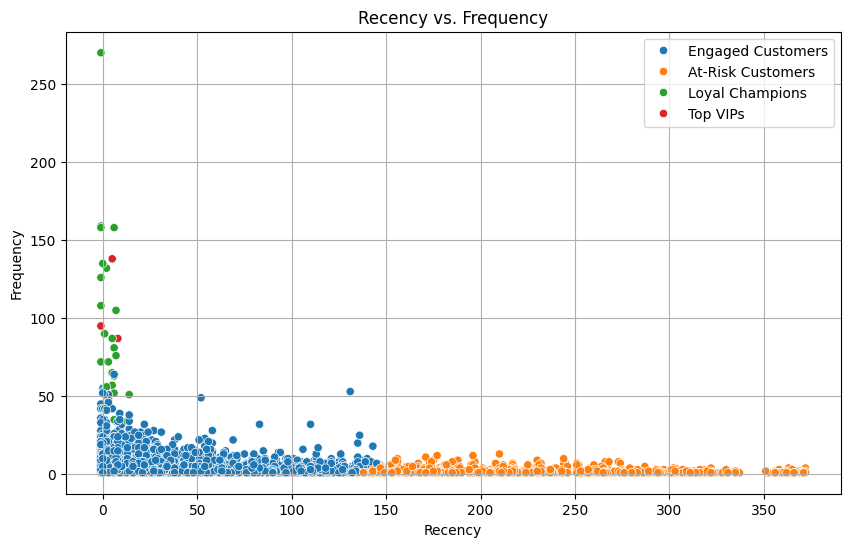

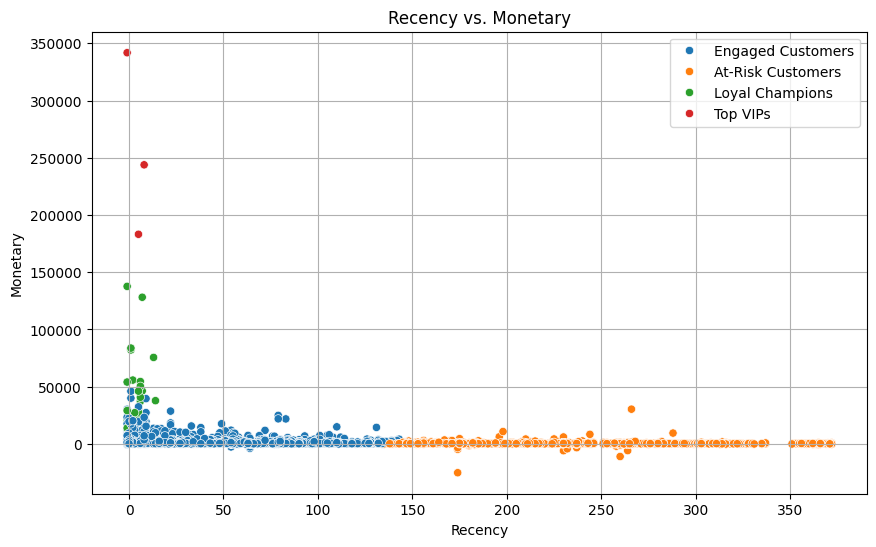

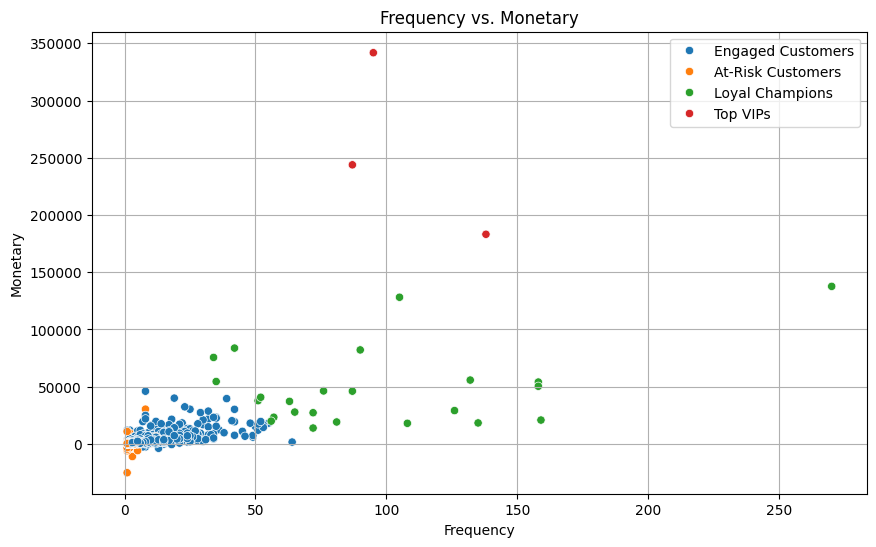

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Recency vs. Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Customer_type', data=RFM)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Scatter plot for Recency vs. Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Customer_type', data=RFM)
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Scatter plot for Frequency vs. Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Customer_type', data=RFM)
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [95]:
result=RFM["Customer_type"].value_counts()

In [96]:
result

Customer_type
Engaged Customers    3273
At-Risk Customers    1083
Loyal Champions        24
Top VIPs                3
Name: count, dtype: int64

<Axes: ylabel='Customer_type'>

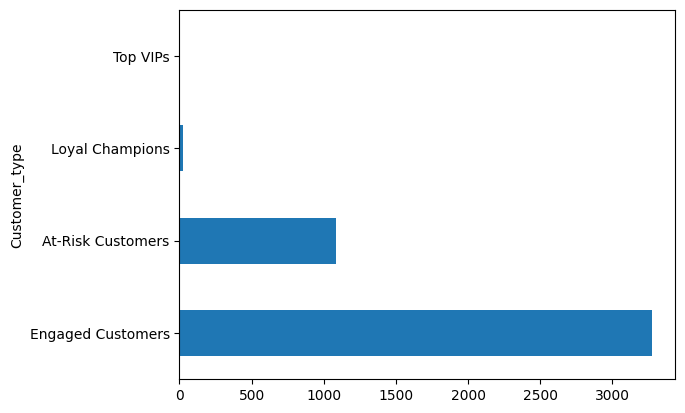

In [98]:
result.plot(kind="barh")

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_10356\3533658358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_type', y='Recency', data=RFM, palette='viridis')


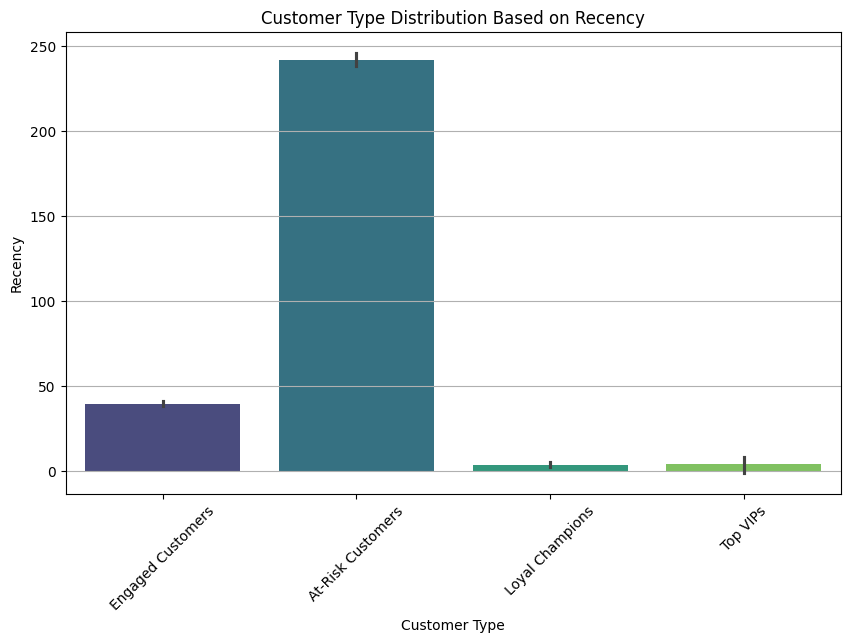

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Recency
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_type', y='Recency', data=RFM, palette='viridis')
plt.title('Customer Type Distribution Based on Recency')
plt.xlabel('Customer Type')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_10356\3958151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_type', y='Frequency', data=RFM, palette='viridis')


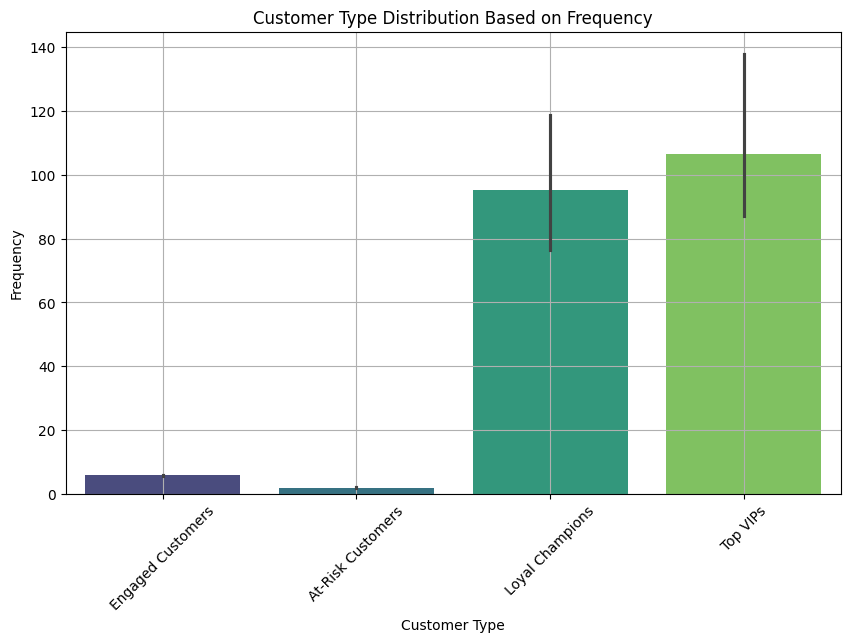

In [109]:
# Plotting Recency
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_type', y='Frequency', data=RFM, palette='viridis')
plt.title('Customer Type Distribution Based on Frequency')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_10356\1585263046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_type', y='Monetary', data=RFM, palette='viridis')


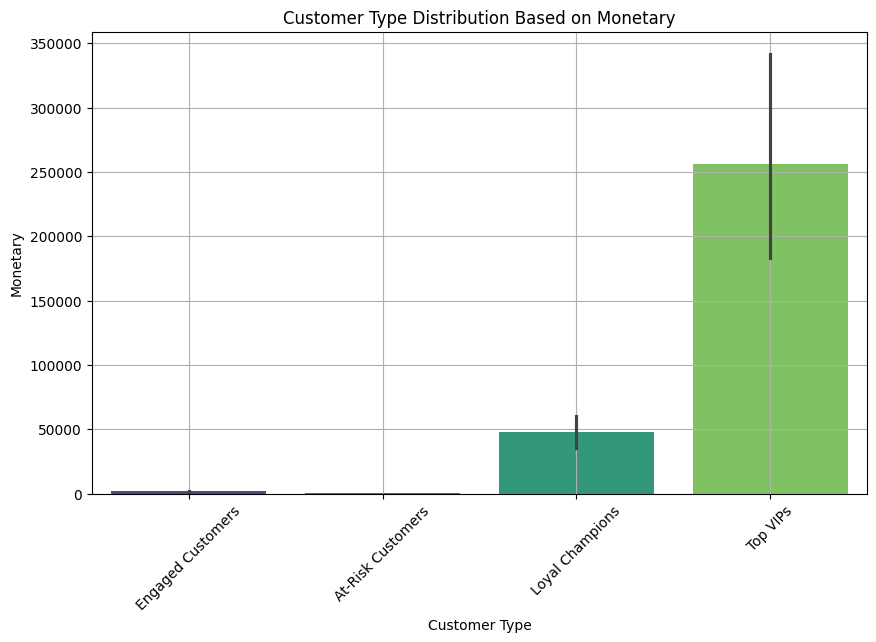

In [111]:
# Plotting Recency
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_type', y='Monetary', data=RFM, palette='viridis')
plt.title('Customer Type Distribution Based on Monetary')
plt.xlabel('Customer Type')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [123]:
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,ttl_amount,total_amount
InvoiceDate,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,30.00
...,...,...,...,...,...,...,...,...,...
2010-12-09 20:01:00,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom,5.90,5.90
2010-12-09 20:01:00,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom,3.75,3.75
2010-12-09 20:01:00,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom,3.75,3.75


In [142]:
import pandas as pd

# Assuming you have a DataFrame named df with the "InvoiceDate" column
df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [144]:
df.set_index('Date', inplace=True)

In [145]:
df

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,total_amount
Date,,,,,,,,,
2009-12-01,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
2010-12-09,2010-12-09 20:01:00,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom,5.90
2010-12-09,2010-12-09 20:01:00,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom,3.75
2010-12-09,2010-12-09 20:01:00,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom,3.75


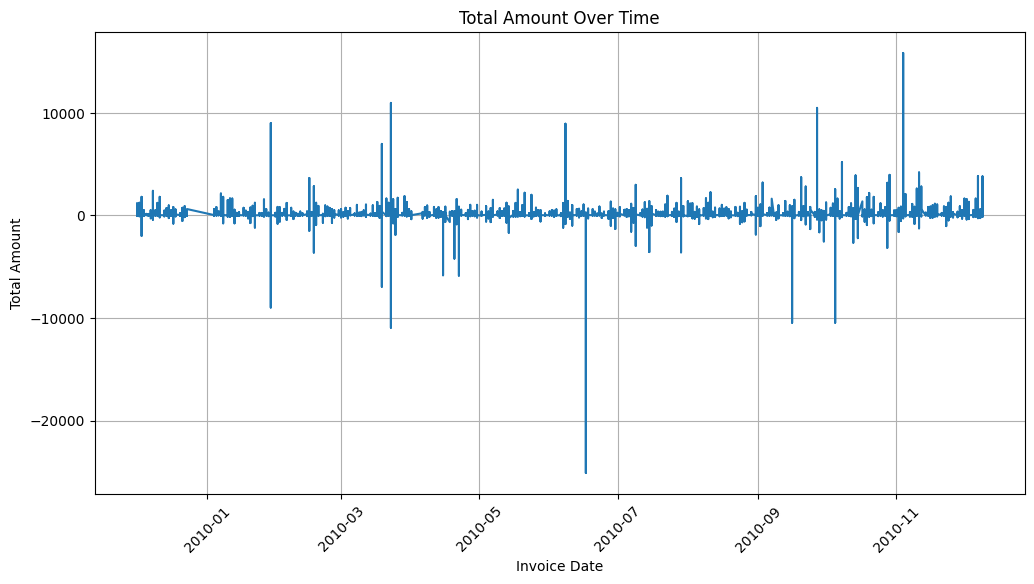

In [146]:
# Plotting only the "Total Amount" column
df['total_amount'].plot(figsize=(12, 6),  linestyle='-')
plt.title('Total Amount Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




MemoryError: Unable to allocate 242. MiB for an array with shape (76, 417436) and data type float64

InvoiceDate     datetime64[ns]
Invoice                 object
StockCode               object
Description             object
Quantity                 int64
Price                  float64
Customer ID            float64
Country                 object
total_amount           float64
dtype: object